In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Below is a definition of each column in dataset:

### **1. Identifiers**
- **id**: (Integer) Unique identifier for each patient.

### **2. Demographics**
- **age**: (Integer) Age of the patient in years.
- **sex**: (Categorical) Gender of the patient (male, female).
- **race**: (Categorical) Race of the patient (asian, black, hispanic, missing, other, white).
- **edu**: (Integer) Years of education.
- **income**: (Categorical) Income category ("under11k", "11−25k", "25−50k", ">50k").

### **3. Medical Conditions**
- **dzgroup**: (Categorical) Disease subcategory (e.g., ARF/MOSF w/Sepsis, CHF, COPD, Cirrhosis, etc.).
- **dzclass**: (Categorical) Disease category (ARF/MOSF, COPD/CHF/Cirrhosis, Cancer, Coma).
- **num.co**: (Integer) Number of comorbidities (higher values indicate worse condition).
- **diabetes**: (Binary) Presence of diabetes (Y/N).
- **dementia**: (Binary) Presence of dementia (Y/N).
- **ca**: (Categorical) Cancer status (yes, metastatic, no).

### **4. Hospitalization & Treatment**
- **hday**: (Integer) Day in hospital at which the patient entered the study.
- **dnr**: (Categorical) Do Not Resuscitate (DNR) status (dnr after sadm, dnr before sadm, missing, no dnr).
- **dnrday**: (Integer) Day of DNR order (<0 if before study).
- **charges**: (Float) Hospital charges.
- **totcst**: (Float) Total ratio of costs to charges.
- **totmcst**: (Float) Total micro cost.
- **avtisst**: (Float) Average TISS score (Therapeutic Intervention Scoring System).

### **5. Physiological & Lab Measurements (Day 3)**
- **scoma**: (Float) Coma Score based on the Glasgow scale.
- **sps**: (Float) SUPPORT physiology score.
- **aps**: (Float) APACHE III day 3 physiology score.
- **meanbp**: (Float) Mean arterial blood pressure.
- **wblc**: (Float) White blood cell count (in thousands).
- **hrt**: (Integer) Heart rate.
- **resp**: (Integer) Respiration rate.
- **temp**: (Float) Temperature (Celsius).
- **pafi**: (Float) PaO2/FiO2 ratio.
- **alb**: (Float) Serum albumin levels.
- **bili**: (Float) Bilirubin levels.
- **crea**: (Float) Serum creatinine levels.
- **sod**: (Float) Serum sodium concentration.
- **ph**: (Float) Arterial blood pH.
- **glucose**: (Float) Blood glucose level.
- **bun**: (Float) Blood urea nitrogen level.
- **urine**: (Float) Urine output.

### **6. Functional & Survival Predictions**
- **adlp**: (Float) Activities of Daily Living (ADL) score (self-reported).
- **adls**: (Float) ADL score (reported by a surrogate, e.g., family member).
- **adlsc**: (Float) Imputed ADL Calibrated to Surrogate.
- **surv2m**: (Float) SUPPORT model 2-month survival estimate.
- **surv6m**: (Float) SUPPORT model 6-month survival estimate.
- **prg2m**: (Float) Physician’s 2-month survival estimate.
- **prg6m**: (Float) Physician’s 6-month survival estimate.

### **7. Target Variable**
- **death**: (Binary) Whether the patient died (1) or survived (0).



## 1. Data Understanding & Exploration

In [37]:
df = pd.read_csv('HealthRiskData\dataset.csv')
df.describe()

,age,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,surv2m,surv6m,hday,diabetes,dementia,prg2m,prg6m,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,Id
count,7284.000000,7284.000000,5969.000000,7283.000000,7.156000e+03,6575.000000,4506.000000,7218.000000,7283.000000,7283.000000,7283.000000,7283.000000,7284.000000,7284.000000,7284.000000,5979.000000,5992.000000,7259.000000,7284.000000,7110.000000,7284.000000,7284.000000,7284.000000,5429.000000,4601.000000,5206.000000,7234.000000,7284.000000,5468.000000,3691.000000,3816.000000,3407.000000,2768.000000,4988.000000,7284.000000,7284.000000,7284.000000
mean,62.651689,1.875206,11.718211,12.237539,6.005533e+04,30510.032023,28747.116082,22.581808,25.618397,37.704105,0.633104,0.516539,4.369989,0.195634,0.031713,0.616777,0.497517,14.456812,84.413303,12.336280,97.242449,23.298325,37.109175,239.435697,2.937224,2.580454,1.767788,137.591708,7.415360,159.256028,32.397274,2192.288927,1.158237,1.624900,1.877531,0.682867,3641.500000
std,15.619063,1.347470,3.466423,24.696769,1.043454e+05,45044.530406,43679.696692,13.192527,9.962643,19.899105,0.248455,0.253631,9.014930,0.396715,0.175248,0.299213,0.305217,19.766908,27.778871,9.459789,31.515285,9.495258,1.253714,110.146173,0.793503,5.338742,1.672551,6.003795,0.080656,87.876500,26.741968,1468.096769,1.731184,2.212638,1.987490,0.465392,2102.854013
min,18.118990,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,1.199951,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-88.000000,0.000000,0.000000,0.000000,0.000000,32.093750,12.000000,0.500000,0.099991,0.099991,112.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.767000,1.000000,10.000000,0.000000,9.821750e+03,5968.294950,5181.085940,12.000000,19.000000,23.000000,0.497986,0.334961,1.000000,0.000000,0.000000,0.500000,0.200000,4.000000,63.000000,6.899414,72.000000,18.000000,36.195310,155.000000,2.399902,0.500000,0.899902,134.000000,7.379883,102.000000,14.000000,1165.000000,0.000000,0.000000,0.000000,0.000000,1820.750000
50%,64.882965,2.000000,12.000000,0.000000,2.535552e+04,14531.343800,13431.000000,19.666656,24.000000,35.000000,0.711914,0.568970,1.000000,0.000000,0.000000,0.700000,0.500000,9.000000,77.000000,10.599609,100.000000,24.000000,36.695310,224.000000,2.899902,0.899902,1.199951,137.000000,7.419922,134.000000,23.000000,1950.000000,0.000000,1.000000,1.000000,1.000000,3641.500000
75%,74.089737,3.000000,14.000000,9.000000,6.433375e+04,35765.031300,34046.632850,31.500000,30.296875,49.000000,0.825928,0.723999,3.000000,0.000000,0.000000,0.900000,0.750000,17.000000,107.000000,15.298828,120.000000,28.000000,38.195310,304.750000,3.599609,1.899902,1.899902,141.000000,7.469727,186.000000,42.000000,2995.000000,2.000000,3.000000,3.000000,1.000000,5462.250000
max,100.849000,8.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,78.000000,99.187500,143.000000,0.966919,0.943970,147.000000,1.000000,1.000000,1.000000,1.000000,285.000000,193.000000,200.000000,300.000000,76.000000,41.695310,890.375000,8.599609,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242,1.000000,7283.000000


#### 1.1. Check The Shape of The Dataset

In [38]:
df.shape

(7284, 44)

#### 1.2. Checking Class Imbalance in Dataset

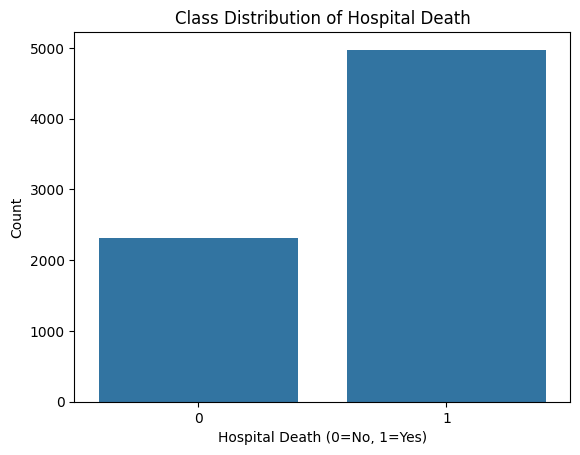

In [39]:
sns.countplot(x=df['death'])
plt.title("Class Distribution of Hospital Death")
plt.xlabel("Hospital Death (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()


#### 1.3. Check Data Types

In [40]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
for col in categorical_cols: print(col, end=", ")

Categorical Columns:
sex, dzgroup, dzclass, income, race, ca, dnr, 

In [41]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns: ")

for col in numerical_cols: print(col, end=", ")


Numerical Columns: 
age, num.co, edu, scoma, charges, totcst, totmcst, avtisst, sps, aps, surv2m, surv6m, hday, diabetes, dementia, prg2m, prg6m, dnrday, meanbp, wblc, hrt, resp, temp, pafi, alb, bili, crea, sod, ph, glucose, bun, urine, adlp, adls, adlsc, death, Id, 

#### 1.4. Checking Missing values in Dataset

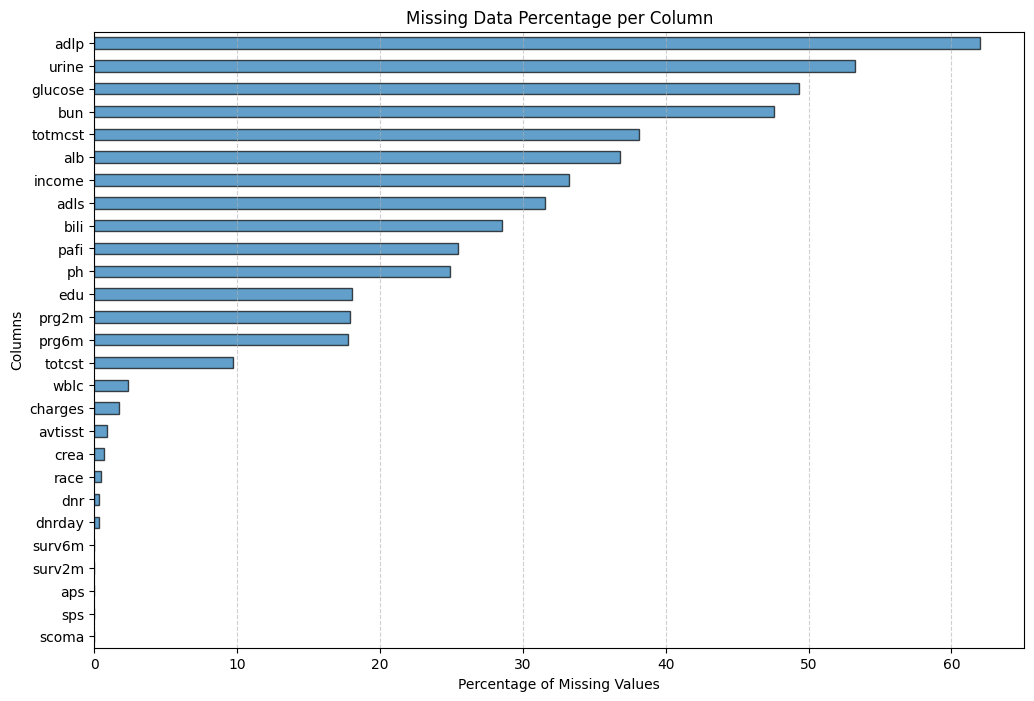

In [42]:
# Set pandas to display all columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_columns = missing_percentage[missing_percentage > 0]


plt.figure(figsize=(12, 8))
missing_columns.sort_values().plot(kind='barh', edgecolor='black',alpha=0.7)
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Data Percentage per Column')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show plot
plt.show()

#### 1.5. Check for Duplicate Rows

In [43]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


#### 1.6. Check for Constant Columns

In [44]:
constant_columns = df.nunique()[df.nunique() == 1]
print("Constant columns:", constant_columns)


Constant columns: Series([], dtype: int64)


#### 1.7. Categorical Feature Cardinality Check

In [45]:
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")


sex: 2 unique values
dzgroup: 8 unique values
dzclass: 4 unique values
income: 4 unique values
race: 5 unique values
ca: 3 unique values
dnr: 3 unique values


---
---
---

## 2. Preprocessing and Feature Extraction